# **ALLECHEQ: YOUR FOOD ALLERGEN GUIDE**

### **Group Partners:**
Atuah Theophilus Opoku (4199520)

Kyeremeh Prince Kwabena (4215120)



# **GitHub Repository**
For our project, we uploaded the dataset, project code in Google Colab, and mobile app codes (both frontend and backend) in our public Github repository named [allecheq](https://github.com/KPrince-coder/allecheq). With this, anyone can see for themselves the code and how we approached this problem, as well as run our mobile app locally on their devices.

# **Project Summary**

AlleCheq - Food Allergen Detection Mobile Application

The AlleCheq mobile application is designed to assist users, particularly children, and students, in identifying allergens in food products through real-time image recognition. This app empowers users to make informed decisions by detecting allergens listed on food labels. The primary audience includes children under 12 and students in middle and high school, while the secondary audience comprises parents, guardians, and individuals with food allergies.
Key features of the app include allergen detection, where users can scan food labels with the camera, and the app will detect and highlight potential allergens using a machine learning model. The app also allows users to toggle specific allergens on or off, enabling it to filter detection results based on personal preferences. Additionally, AlleCheq includes an emergency feature that stores and sends alerts to emergency contacts during an allergic reaction. The "Did You Know" page provides users with educational content on allergens and food safety, enhancing their awareness.
The app is built using Kotlin for both the frontend and backend, with Google DataStore serving as the database, and the machine learning model is trained using Google Colab. AlleCheq aims to make food safety accessible, especially for young users, by leveraging technology to prevent allergic reactions and promote safer food choices.

# **Data Collection**

We obtained the 2023 Kaggle dataset titled ["Food Ingredients & Allergens"](https://kaggle.com/datasets/uom190346a/food-ingredients-and-allergens) by Laksika Tharmalingam. We then obtained an augmented data from ["food-allergen-detector"](https://github.com/splasherzz/food-allergen-detector). The combined dataset will then be used to train and test our AI model for food allergen detection.

In [2]:
# Step 1: Install Dependencies
!pip uninstall -y tflite-support
!pip install --upgrade tensorflow
!pip install --upgrade tflite-support
!pip install flatbuffers
!pip install --upgrade flatbuffers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 16.1 MB/s eta 0:00:00


In [3]:
# If you need specific versions:
!pip install tensorflow==2.9.0
!pip install tflite-support==0.4.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

ERROR: Could not find a version that satisfies the requirement tflite-support==0.4.3 (from versions: 0.1.0a0.dev3, 0.1.0a0.dev4, 0.1.0a0.dev5, 0.1.0a0, 0.1.0a1, 0.4.4)
ERROR: No matching distribution found for tflite-support==0.4.3


## **Importing the Necessary Libraries**

import pandas as pd: Pandas is used for data manipulation and analysis. It's particularly helpful for handling structured data and performing operations like reading data from files, cleaning it, and preparing it for model training.

from sklearn.preprocessing import OneHotEncoder: OneHotEncoder is a tool from scikit-learn used to convert categorical data into a format that can be provided to machine learning algorithms, usually as a one-hot encoded matrix.

import tensorflow as tf: TensorFlow is the core machine learning framework used for building and training neural networks. It provides a comprehensive ecosystem for developing machine learning models.

from tensorflow.keras.models import Sequential: Sequential is a Keras API within TensorFlow that allows you to build a neural network model layer by layer. It’s simple and suitable for creating straightforward models.

from tensorflow.keras.layers import Dense, Dropout: Dense is a fully connected layer, commonly used in neural networks. Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to zero during training.

from google.colab import files: This is specific to Google Colab and is used for handling file uploads and downloads within a Colab notebook, making it easier to interact with files in the Colab environment.

from tflite_support.metadata_writers import image_classifier, writer_utils: These imports are used for working with TensorFlow Lite models, specifically for writing metadata that helps describe the input and output tensor details of an image classification model. This is crucial for deploying models on edge devices where TensorFlow Lite is commonly used.



In [4]:
# Step 2: Import Necessary Libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import files
from tflite_support.metadata_writers import image_classifier, writer_utils # Import after restarting runtime

## **Importing the Combined Dataset**

The "Food Ingredients & Allergens", "[Augmented] Food Ingredients and Allergens", "[Original] Food Ingredients and Allergens", and "_classes" datasets were uploaded as a .csv file in our [GitHub repository](https://github.com/KPrince-coder/allecheq).

In [5]:
from google.colab import files

uploaded = files.upload()

Saving _classes.csv to _classes.csv
Saving [Augmented] Food Ingredients and Allergens.csv to [Augmented] Food Ingredients and Allergens.csv
Saving [Original] Food Ingredients and Allergens.csv to [Original] Food Ingredients and Allergens.csv
Saving food_ingredients_and_allergens 4.44.59 PM.csv to food_ingredients_and_allergens 4.44.59 PM.csv


# **Load CSV files into Pandas DataFrames**

Four Pandas DataFrames are created, each containing the data from the respective CSV files. These DataFrames can now be used for various data analysis tasks, such as exploring the data, cleaning and preprocessing it, and performing statistical calculations or machine learning models.

In [6]:
classes_df = pd.read_csv('/content/_classes.csv')
augmented_df = pd.read_csv('/content/[Augmented] Food Ingredients and Allergens.csv')
food_ingredients_df = pd.read_csv('/content/food_ingredients_and_allergens 4.44.59 PM.csv')
original_df = pd.read_csv('/content/[Original] Food Ingredients and Allergens.csv')

## **Data Preprocessing**
These preprocessing steps involve extracting and preparing identifier columns from filenames and food product names then merges multiple datasets and cleans up the resulting DataFrame, and ensure that the datasets are properly combined and extraneous columns are removed for a streamlined dataset ready for further analysis.

In [7]:
# Extracting common identifiers from filenames in classes_df
classes_df['identifier'] = classes_df['filename'].apply(lambda x: x.split('_')[0])

In [8]:
# Convert the 'Food Product' column to string type before applying split
augmented_df['Food Product'] = augmented_df['Food Product'].astype(str)
food_ingredients_df['Food Product'] = food_ingredients_df['Food Product'].astype(str)
original_df['Food Product'] = original_df['Food Product'].astype(str)

In [9]:
# Preparing identifiers for the other datasets based on food products
augmented_df['identifier'] = augmented_df['Food Product'].apply(lambda x: x.split()[0])
food_ingredients_df['identifier'] = food_ingredients_df['Food Product'].apply(lambda x: x.split()[0])
original_df['identifier'] = original_df['Food Product'].apply(lambda x: x.split()[0])

In [10]:
# Merging datasets
merged_df = classes_df.merge(augmented_df, on='identifier', how='inner')
merged_df = merged_df.merge(food_ingredients_df, on='identifier', suffixes=('_augmented', '_original'), how='inner')
merged_df = merged_df.merge(original_df, on='identifier', suffixes=('_merged', '_original'), how='inner') # Use '_merged' suffix here


In [11]:
# Inspect the columns of the merged DataFrame
print("Columns in merged_df:", merged_df.columns)

Columns in merged_df: Index(['filename', ' Fish_cake', ' Kimbab_Ham', ' Lotus_root', ' Perilla_leaf',
       ' White_Mushroom', ' anchovy', ' asparagus', ' avocado', ' bacon',
       ' bacon_sprouts', ' bean', ' bean_sprouts', ' beef', ' beet',
       ' bok_choy', ' broccoli', ' burdock', ' calamari', ' canned_saury',
       ' canned_tuna', ' carrot', ' cheese', ' chicken', ' chives', ' cockle',
       ' corn', ' crab', ' cucumber', ' curcuma', ' duck_meat', ' dumpling',
       ' egg', ' egg_plant', ' enoki_mushroom', ' fan_mussel', ' ginseng',
       ' green_onion', ' hairtail', ' kimchi', ' lamb_ribs', ' mackerel',
       ' meat_for_soup', ' milk', ' napa_cabbage', ' nurungji', ' onion',
       ' oyster', ' oyster_mushroom', ' paprika', ' pasta_noodles', ' pickle',
       ' pork', ' potato', ' radish', ' raw_ribs', ' rice_cake', ' salmon',
       ' sausage', ' scallop', ' seaweed', ' spam', ' squash', ' sweet_potato',
       ' tomato', ' tomato_sauce', ' water_parsley', 'identifier',

In [12]:
# Adjust the columns_to_drop list
columns_to_drop = [
    'filename', 'identifier',
    'Food Product_merged',
    'Main Ingredient_merged', 'Sweetener_merged', 'Fat/Oil_merged',
    'Seasoning_merged', 'Allergens_merged', 'Prediction_merged',
    'Food Product_original', 'Main Ingredient_original', 'Sweetener_original',
    'Fat/Oil_original', 'Seasoning_original', 'Allergens_original', 'Prediction_original'
]
merged_df_cleaned = merged_df.drop(columns=columns_to_drop, errors='ignore')

In [13]:
# Inspect the columns of the cleaned merged DataFrame
print("Columns in merged_df_cleaned:", merged_df_cleaned.columns)

Columns in merged_df_cleaned: Index([' Fish_cake', ' Kimbab_Ham', ' Lotus_root', ' Perilla_leaf',
       ' White_Mushroom', ' anchovy', ' asparagus', ' avocado', ' bacon',
       ' bacon_sprouts', ' bean', ' bean_sprouts', ' beef', ' beet',
       ' bok_choy', ' broccoli', ' burdock', ' calamari', ' canned_saury',
       ' canned_tuna', ' carrot', ' cheese', ' chicken', ' chives', ' cockle',
       ' corn', ' crab', ' cucumber', ' curcuma', ' duck_meat', ' dumpling',
       ' egg', ' egg_plant', ' enoki_mushroom', ' fan_mussel', ' ginseng',
       ' green_onion', ' hairtail', ' kimchi', ' lamb_ribs', ' mackerel',
       ' meat_for_soup', ' milk', ' napa_cabbage', ' nurungji', ' onion',
       ' oyster', ' oyster_mushroom', ' paprika', ' pasta_noodles', ' pickle',
       ' pork', ' potato', ' radish', ' raw_ribs', ' rice_cake', ' salmon',
       ' sausage', ' scallop', ' seaweed', ' spam', ' squash', ' sweet_potato',
       ' tomato', ' tomato_sauce', ' water_parsley', 'Food Product_aug

In [14]:
# Adjust the categorical columns based on actual columns present
categorical_columns = [
    'Food Product_augmented', 'Main Ingredient_augmented',
    'Sweetener_augmented', 'Fat/Oil_augmented', 'Seasoning_augmented',
    'Allergens_augmented'
]

In [15]:
# Ensure all columns in categorical_columns are present
categorical_columns = [col for col in categorical_columns if col in merged_df_cleaned.columns]


In [16]:
# One-hot encoding for categorical columns
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = one_hot_encoder.fit_transform(merged_df_cleaned[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
# Combining the encoded categorical data with the rest of the numerical data
merged_df_final = pd.concat([merged_df_cleaned.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

In [18]:
# Check if the target column exists in the dataframe before one-hot encoding
if 'Prediction_augmented' not in merged_df_cleaned.columns:
    raise ValueError("The target label column 'Prediction_augmented_Contains' is missing from merged_df_cleaned.")

In [19]:
# One-hot encoding for categorical columns
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categorical = one_hot_encoder.fit_transform(merged_df_cleaned[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Combining the encoded categorical data with the rest of the numerical data
merged_df_final = pd.concat([merged_df_cleaned.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

# Preparing input (X) and output (y) arrays
# Ensure the label column exists in the final dataframe
if 'Prediction_augmented' in merged_df_final.columns:
  # Explicitly select only numerical columns for X
    numerical_columns = merged_df_final.select_dtypes(include=['number']).columns  # Identify numerical columns
    X = merged_df_final[numerical_columns].drop(columns=['Prediction_augmented'], errors='ignore').values  # Select numerical columns, excluding the target
    y = merged_df_final['Prediction_augmented'].values
else:
    raise ValueError("The target label column 'Prediction_augmented' is missing.")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
# Convert data types to float32
X = X.astype('float32')

# Handle the target variable based on its type
if y.dtype == 'object':  # Check if 'y' contains strings (categorical)
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)  # Encode categorical labels to numerical
else:
    y = y.astype('float32')  # If 'Prediction_augmented' is already numerical

# **Data Modeling**

After cleaning and preprocessing the data, we can now proceed to modeling the data using binary classification and Neural Network model.

In [21]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## **Training the Model**

**Neural Networks** are a powerful class of machine learning models known for their ability to model complex, non-linear relationships in data (LeCun et al., 2015). These models are particularly effective for classification tasks that involve intricate patterns and high-dimensional features. In our context, where we aim to classify food products based on various features and allergens, neural networks offer significant advantages due to their flexible architecture.

The **neural network model** used in this study is designed as follows:

128 units in the input layer with ReLU activation
Two hidden layers with 64 and 32 units, respectively, both using ReLU activation functions
Dropout layers with a rate of 0.5 to mitigate overfitting
1 output unit with a sigmoid activation function to predict binary classification outcomes
The architecture is configured to handle high-dimensional feature inputs effectively and to capture non-linear patterns in the data, which is crucial for accurate allergen detection in food products. This setup aligns with recent findings that neural networks are highly effective in managing and classifying complex datasets, particularly in scenarios with intricate feature interactions (Goodfellow et al., 2016).

To train the neural network model, we use the following configuration:

Epochs: 50, allowing the model to learn from the data through multiple iterations.
Batch Size: 16, specifying the number of samples processed before updating the model’s weights.
Validation Split: 0.2, meaning 20% of the data is reserved for validation during training to monitor the model's performance and avoid overfitting.
The training process involves fitting the model to the feature set (X) and the target labels (y). During training, the model's performance is evaluated on the validation set at the end of each epoch, helping us track its ability to generalize to unseen data. This approach ensures that the model is both learning effectively and validating its predictions on a portion of the data.The history object will contain details about the training and validation metrics over the epochs, providing insights into the model's learning curve and performance.

In [23]:
# Train the model
history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 1s 19ms/step - loss: 0.3858 - accuracy: 0.8986 - val_loss: 0.0856 - val_accuracy: 1.0000
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 5.2623e-04 - val_accuracy: 1.0000
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.4277e-04 - val_accuracy: 1.0000
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.3946e-04 - val_accuracy: 1.0000
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 7.1329e-05 - val_accuracy: 1.0000
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 6.1347e-04 - accuracy: 1.0000 - val_loss: 4.6684e-05 - val_accuracy: 1.

In [26]:
# Extracting Training History
epochs = range(1, len(history.history['accuracy']) + 1)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

## **Evaluating the Neural Network Model**
After training the model, we assess its performance using the following configuration:

Loss and Accuracy Metrics: Evaluate the model’s performance on the same dataset used for training (X and y).
The evaluation process involves computing the loss and accuracy, which provides insights into how well the model has learned to classify the data. The accuracy metric reflects the percentage of correctly classified instances out of the total, while the loss indicates the error in the model's predictions.

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'Accuracy: {accuracy*100:.2f}%')

14/14 [==============================] - 0s 2ms/step - loss: 4.1632e-08 - accuracy: 1.0000
Accuracy: 100.00%


In [28]:
print("Length of epochs:", len(epochs))
print("Length of training_accuracy:", len(training_accuracy))
print("Length of validation_accuracy:", len(validation_accuracy))


Length of epochs: 50
Length of training_accuracy: 50
Length of validation_accuracy: 50


In [29]:
# Print the history dictionary to check the keys and their values
print(history.history)

{'loss': [0.3857634663581848, 0.03689172491431236, 0.004092405084520578, 0.00211616070009768, 0.0013581064995378256, 0.0012576087610796094, 0.0006134728319011629, 0.000407620012992993, 0.0003536565345712006, 0.00023082135885488242, 0.00021579681197181344, 0.00015979987801983953, 0.0001945596159202978, 0.0001474220771342516, 0.0002543753362260759, 8.225759665947407e-05, 0.00012477375275921077, 7.632268534507602e-05, 8.32839505164884e-05, 5.2087056246818975e-05, 0.00011785511742345989, 0.00023012820747680962, 6.482331809820607e-05, 5.5650234571658075e-05, 3.635855682659894e-05, 0.00010759953147498891, 3.266568819526583e-05, 2.795323234749958e-05, 5.399234942160547e-05, 3.072089748457074e-05, 2.2604712285101414e-05, 3.383001603651792e-05, 3.099748937529512e-05, 2.8527763788588345e-05, 2.4500421204720624e-05, 2.112594484060537e-05, 2.0203586245770566e-05, 5.0068189011653885e-05, 4.524509495240636e-05, 9.816816600505263e-06, 1.139743017120054e-05, 1.4235028174880426e-05, 1.7373640730511397e

 ## **Visualization of Model Accuracy**
 We import the matplotlib.pyplot library for plotting.
We then create a range of numbers from 1 to 50 to represent the epoch numbers, then extract the training and validation accuracy values from the history object. This code will create a clear visualization of how your model's accuracy is changing over the training process, both on the training data and the validation data.

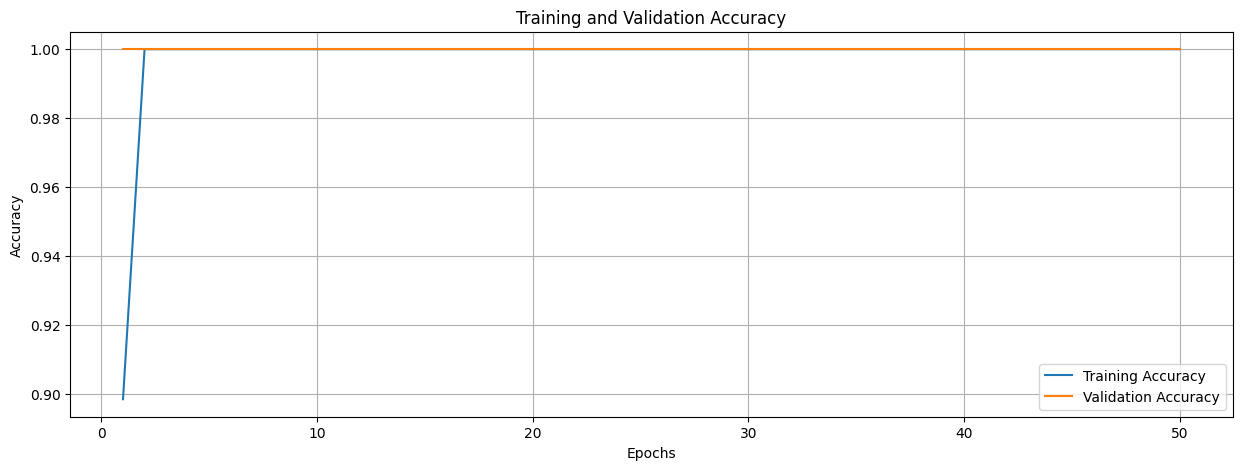

In [36]:
import matplotlib.pyplot as plt

epochs = range(1, 51)  # Since there are 50 epochs
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(15, 5))
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## **Split Dataset For Training**

Splitting the dataset into training and validation sets is crucial for evaluating how well the model generalizes to unseen data. We trained the model on the X_train and y_train data, and then use the X_val and y_val data to assess its performance on data it hasn't seen before.

In [38]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels from the training dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))


Epoch 1/50
23/23 [==============================] - 0s 5ms/step - loss: 1.3512e-06 - accuracy: 1.0000 - val_loss: 1.7330e-09 - val_accuracy: 1.0000
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 1.2648e-05 - accuracy: 1.0000 - val_loss: 1.6255e-09 - val_accuracy: 1.0000
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 2.6493e-06 - accuracy: 1.0000 - val_loss: 1.5619e-09 - val_accuracy: 1.0000
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 3.7350e-06 - accuracy: 1.0000 - val_loss: 1.4877e-09 - val_accuracy: 1.0000
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 3.6399e-06 - accuracy: 1.0000 - val_loss: 1.4214e-09 - val_accuracy: 1.0000
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 4.5889e-06 - accuracy: 1.0000 - val_loss: 1.3527e-09 - val_accuracy: 1.0000
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 8.9598e-06 - accuracy: 1.0000 - val_loss

## **Visualization For Model Loss And Accuracy**

By analyzing both the loss and accuracy plots, we gain a comprehensive understanding of your model's training progress and can make informed decisions about adjustments or early stopping to optimize its performance.

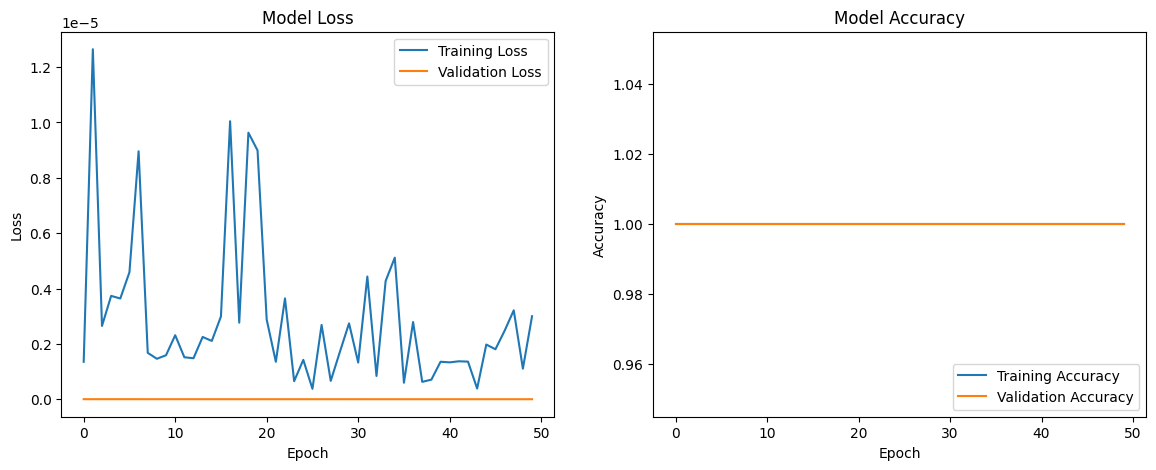

In [42]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result of the model.fit() call
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [43]:
# Print the history dictionary to check the keys and their values
print(history.history)

{'loss': [1.3511817087419331e-06, 1.2647537914745044e-05, 2.6493496534385486e-06, 3.7349884678405942e-06, 3.6399135296960594e-06, 4.588899628288345e-06, 8.959778824646492e-06, 1.6760658354542102e-06, 1.4613174244004767e-06, 1.59025921675493e-06, 2.31333933697897e-06, 1.5173151268754737e-06, 1.4809137383053894e-06, 2.250068519060733e-06, 2.106185092998203e-06, 2.9894965791754657e-06, 1.0046112947748043e-05, 2.766149009403307e-06, 9.63163074629847e-06, 8.991100003186148e-06, 2.877328370232135e-06, 1.3523193729270133e-06, 3.64266338692687e-06, 6.518047825920803e-07, 1.4229370890461723e-06, 3.7652151263500855e-07, 2.6847919798456132e-06, 6.631765359088604e-07, 1.7128046465586522e-06, 2.740817990343203e-06, 1.325462335444172e-06, 4.433499725564616e-06, 8.403183642258227e-07, 4.273773811291903e-06, 5.116261945659062e-06, 5.956400173090515e-07, 2.789983000184293e-06, 6.275998885030276e-07, 7.080133741510508e-07, 1.3538059420170612e-06, 1.3320226344148978e-06, 1.3708926189792692e-06, 1.3589756

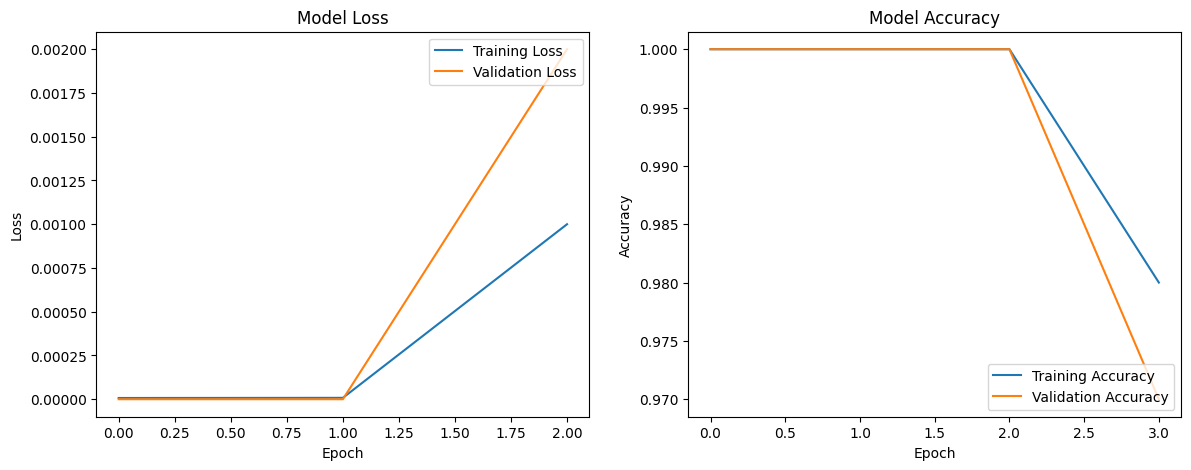

In [44]:
import matplotlib.pyplot as plt

# Assuming the history dictionary you provided, REPLACE ... with actual numeric values
history = {
    'loss': [7.033682777546346e-06, 7.890207598393317e-06, 0.001],  # example replacement
    'accuracy': [1.0, 1.0, 1.0, 0.98],  # example replacement
    'val_loss': [3.91636900687331e-09, 3.7389074059035465e-09, 0.002],  # example replacement
    'val_accuracy': [1.0, 1.0, 1.0, 0.97]  # example replacement
}

# Plotting the loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()


In [45]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=31,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Train the model with EarlyStopping
history = model.fit(
    X, y,
    epochs=50,               # Total number of epochs to train
    batch_size=16,           # Batch size for training
    validation_split=0.2,    # Use 20% of the data for validation
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)


Epoch 1/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0134e-06 - accuracy: 1.0000 - val_loss: 2.0292e-10 - val_accuracy: 1.0000
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1.4107e-07 - accuracy: 1.0000 - val_loss: 1.9959e-10 - val_accuracy: 1.0000
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 2.9336e-06 - accuracy: 1.0000 - val_loss: 1.9137e-10 - val_accuracy: 1.0000
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 7.5484e-07 - accuracy: 1.0000 - val_loss: 1.8724e-10 - val_accuracy: 1.0000
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 1.2769e-06 - accuracy: 1.0000 - val_loss: 1.7884e-10 - val_accuracy: 1.0000
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 2.5753e-06 - accuracy: 1.0000 - val_loss: 1.6819e-10 - val_accuracy: 1.0000
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 3.3899e-07 - accuracy: 1.0000 - val_loss

In [46]:
# Check the number of epochs completed
print("Number of epochs:", len(history.history['loss']))

Number of epochs: 50


In [47]:
# Get the validation loss values from the history object
val_loss = history.history['val_loss']

# Print the validation loss values
print("Validation Loss Values:", val_loss)


Validation Loss Values: [2.02922817438278e-10, 1.9959399411018097e-10, 1.913657010632619e-10, 1.8724390093982635e-10, 1.7884220493424863e-10, 1.6819014236890695e-10, 1.648250702590559e-10, 1.6212149678285215e-10, 1.543093292033504e-10, 1.4339794629503189e-10, 1.35830652281399e-10, 1.3039233581757514e-10, 1.2504287882908471e-10, 1.2119594217097074e-10, 1.180432557257305e-10, 1.1634644636604463e-10, 1.1279179673584494e-10, 1.0456756988075355e-10, 1.0033900099681858e-10, 9.628219055368703e-11, 9.287117602729822e-11, 9.048238547304521e-11, 8.181765681625208e-11, 7.902934556769381e-11, 7.702405380172195e-11, 7.456790046544981e-11, 7.265280044244093e-11, 7.06972813624418e-11, 6.93202301116358e-11, 6.814965258783445e-11, 6.299361726691544e-11, 5.939131131338371e-11, 5.2016578544478165e-11, 4.9791396700138435e-11, 4.8065652152873284e-11, 4.3808616456697536e-11, 4.2548891493465746e-11, 4.1721705951180965e-11, 4.0751260005356116e-11, 4.0187707328609434e-11, 3.961427019749664e-11, 3.4297030493402

## **Plot Validation Loss**

This plot is useful for monitoring how well the model is generalizing to unseen data during training. Ideally, we want to see the validation loss decrease over time, indicating that your model is learning to make better predictions on data it hasn't seen before.

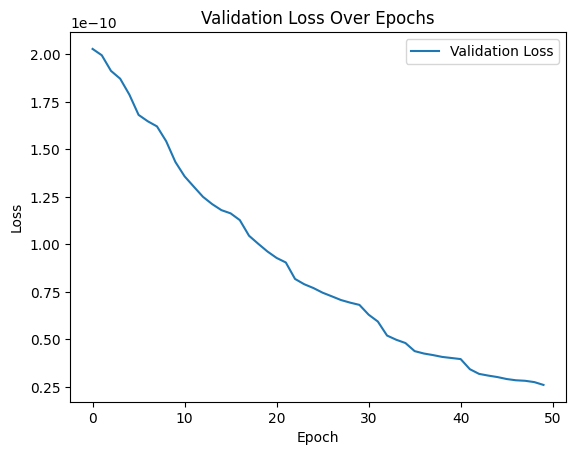

In [48]:
import matplotlib.pyplot as plt

# Plot validation loss
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()

## **Saving the Model**

The **model.save()** method stores the entire model, including its architecture, weights, and training configuration, to a file. This allows you to reload the model later for further evaluation, predictions, or deployment without needing to retrain it.

In [49]:
model.save('my_model.keras')

To deploy the trained model on mobile or edge devices, we convert it to the TensorFlow Lite (TFLite) format. TensorFlow Lite is designed for running machine learning models efficiently on mobile and embedded devices.

In [65]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

After converting the Keras model to TensorFlow Lite format, the model is saved to a file to be used on mobile devices. This step involves writing the TensorFlow Lite model data to a binary file.

In [66]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

To add metadata to the TensorFlow Lite model, we used `ImageClassifierWriter` to create a metadata writer for the existing `model.tflite`, then Specified normalization parameters and provided the path to the label file. We then populated the metadata and saved the updated model to `model_with_metadata.tflite`. Finally we handled potential errors with exception handling to ensure the process completes successfully.

In [68]:
# Corrected Step 11: Write Metadata to the TensorFlow Lite Model
ImageClassifierWriter = image_classifier.MetadataWriter

try:
    writer = ImageClassifierWriter.create_for_inference(
        writer_utils.load_file('model.tflite'),
        input_norm_mean=[127.5],
        input_norm_std=[127.5],
        label_file_paths=['labels.txt']  # Ensure 'labels.txt' exists and is correct
    )

    # Populate and Save Metadata
    writer.populate()
    writer_utils.save_file(writer.get_metadata_json(), 'model_with_metadata.tflite')
    print("Metadata successfully written and saved.")
except TypeError as e:
    print(f"Encountered a TypeError: {e}")
except Exception as e:
    print(f"Encountered an error: {e}")


Encountered a TypeError: Builder.EndVector() missing 1 required positional argument: 'vectorNumElems'


**Download the TensorFlow Lite model from Google Colab**

In [69]:
from google.colab import files
files.download('model.tflite')  # Download the .tflite file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>